**Datos Faltantes:** La imputación de atributos faltantes mediante criterios sencillos como la moda o la media deteriora significativamente el desempeño de un clasificador y con frecuencia arroja peores resultados que eliminar esos ejemplos, siempre y cuando $\color{red}{\text{no se trate de la mayoría.}}$

1. Pregunta de Investigación. Para esta parte, los autores deben elegir una hipótesis de investigación y diseñar un procedimiento experimental que permita reunir evidencia en contra o a favor de la misma. Es legítimo tomar una posición a-priori en base a lo que han aprendido en el curso, pero es importante analizar críticamente los resultados sin descartar hipótesis alternativas.

La metodología debiese incluir al menos 3 datasets, de los cuales al menos 2 deben ser reales. Es deseable también que incluyan experimentos controlados sobre dataset sintéticos o semi-sintéticos diseñados por ustedes. Por ejemplo, un problema donde se crea una variable dummy irrelevante para demostrar que un método logra eliminarla o un dataset donde la cantidad de datos faltantes se vaya modificando. Experimentos de este último tipo, que alteran un dataset real contarán como realizados sobre "dataset reales".

Si no es relevante para la pregunta de investigación y en honor al tiempo, no es necesario llevar a cabo un analisis exploratorio detallado de cada dataset utilizado.

**DataSet caballos: Aquí la mayoria de las filas tienen al menos un na**

In [114]:
import pandas as pd
# load dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/horse-colic.csv'
dataframe = pd.read_csv(url, header=None, na_values='?')

In [105]:
dataframe

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,2.0,1,530101,38.5,66.0,28.0,3.0,3.0,NaN,2.0,...,45.0,8.4,NaN,NaN,2.0,2,11300,0,0,2
1,1.0,1,534817,39.2,88.0,20.0,NaN,NaN,4.0,1.0,...,50.0,85.0,2.0,2.0,3.0,2,2208,0,0,2
2,2.0,1,530334,38.3,40.0,24.0,1.0,1.0,3.0,1.0,...,33.0,6.7,NaN,NaN,1.0,2,0,0,0,1
3,1.0,9,5290409,39.1,164.0,84.0,4.0,1.0,6.0,2.0,...,48.0,7.2,3.0,5.3,2.0,1,2208,0,0,1
4,2.0,1,530255,37.3,104.0,35.0,NaN,NaN,6.0,2.0,...,74.0,7.4,NaN,NaN,2.0,2,4300,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1.0,1,533886,NaN,120.0,70.0,4.0,NaN,4.0,2.0,...,55.0,65.0,NaN,NaN,3.0,2,3205,0,0,2
296,2.0,1,527702,37.2,72.0,24.0,3.0,2.0,4.0,2.0,...,44.0,NaN,3.0,3.3,3.0,1,2208,0,0,1
297,1.0,1,529386,37.5,72.0,30.0,4.0,3.0,4.0,1.0,...,60.0,6.8,NaN,NaN,2.0,1,3205,0,0,2
298,1.0,1,530612,36.5,100.0,24.0,3.0,3.0,3.0,1.0,...,50.0,6.0,3.0,3.4,1.0,1,2208,0,0,1


In [100]:
...
# summarize the first few rows
dataframe.head()
d2=dataframe.dropna()
d2.shape[0]
c_f_nulas=dataframe.shape[0]-d2.shape[0]

In [79]:
c_f_nulas

294

Establecemos un criterio para no eliminar tantas:

    IDEA: quesea una suma lineal menor que un umbral, donde la suma sea por filas de pesos de correlacion de la columna
        por la variable binaria si es na o no.
        
      

 $\sum_{j} c_{ij}x_{j}$

In [116]:
l=[]
for i in range(dataframe.shape[0]):
    c=0
    for j in range(dataframe.shape[1]):
        if dataframe.iloc[i].isnull()[j]==True:
            c+=1
    if c>= 10:
        l.append(i)
        print(i, "borrada")
        
df=dataframe.drop(l, axis=0).reset_index()
        
        



4 borrada
17 borrada
23 borrada
25 borrada
28 borrada
39 borrada
41 borrada
53 borrada
56 borrada
72 borrada
74 borrada
87 borrada
102 borrada
113 borrada
129 borrada
130 borrada
141 borrada
160 borrada
161 borrada
169 borrada
174 borrada
175 borrada
177 borrada
185 borrada
207 borrada
216 borrada
217 borrada
218 borrada
227 borrada
230 borrada
232 borrada
243 borrada
262 borrada
268 borrada
274 borrada
280 borrada
283 borrada
287 borrada
288 borrada
299 borrada


In [117]:
df.shape

(260, 29)

Analisis por columna

In [7]:
...
# summarize the number of rows with missing values for each column
for i in range(dataframe.shape[1]):
	# count number of rows with missing values
	n_miss = dataframe[[i]].isnull().sum()
	perc = n_miss / dataframe.shape[0] * 100
	print('> %d, Missing: %d (%.1f%%)' % (i, n_miss, perc))

> 0, Missing: 1 (0.3%)
> 1, Missing: 0 (0.0%)
> 2, Missing: 0 (0.0%)
> 3, Missing: 60 (20.0%)
> 4, Missing: 24 (8.0%)
> 5, Missing: 58 (19.3%)
> 6, Missing: 56 (18.7%)
> 7, Missing: 69 (23.0%)
> 8, Missing: 47 (15.7%)
> 9, Missing: 32 (10.7%)
> 10, Missing: 55 (18.3%)
> 11, Missing: 44 (14.7%)
> 12, Missing: 56 (18.7%)
> 13, Missing: 104 (34.7%)
> 14, Missing: 106 (35.3%)
> 15, Missing: 247 (82.3%)
> 16, Missing: 102 (34.0%)
> 17, Missing: 118 (39.3%)
> 18, Missing: 29 (9.7%)
> 19, Missing: 33 (11.0%)
> 20, Missing: 165 (55.0%)
> 21, Missing: 198 (66.0%)
> 22, Missing: 1 (0.3%)
> 23, Missing: 0 (0.0%)
> 24, Missing: 0 (0.0%)
> 25, Missing: 0 (0.0%)
> 26, Missing: 0 (0.0%)
> 27, Missing: 0 (0.0%)


In [13]:
# statistical imputation transform for the horse colic dataset
from numpy import isnan
from pandas import read_csv
from sklearn.impute import SimpleImputer
# load dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/horse-colic.csv'
dataframe = read_csv(url, header=None, na_values='?')
# split into input and output elements
data = dataframe.values
ix = [i for i in range(data.shape[1]) if i != 23] ## clasificamos 23
X, y = data[:, ix], data[:, 23]
# print total missing
print('Missing: %d' % sum(isnan(X).flatten()))
print("numero de datos", data.shape[0]*(data.shape[1]-1))
print("datos faltantes son de un",(sum(isnan(X).flatten()))/(data.shape[0]*(data.shape[1]-1))*100)
# define imputer
imputer = SimpleImputer(strategy='mean')
# fit on the dataset
imputer.fit(X)
# transform the dataset
Xtrans = imputer.transform(X)
# print total missing
print('Missing: %d' % sum(isnan(Xtrans).flatten()))

Missing: 1605
numero de datos 8100
datos faltantes son de un 19.814814814814817
Missing: 0


In [10]:
ix

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 24,
 25,
 26,
 27]

In [15]:
# evaluate mean imputation and random forest for the horse colic dataset
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
# load dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/horse-colic.csv'
dataframe = read_csv(url, header=None, na_values='?')
# split into input and output elements
data = dataframe.values
ix = [i for i in range(data.shape[1]) if i != 23]
X, y = data[:, ix], data[:, 23]
# define modeling pipeline
model = LogisticRegression()
imputer = SimpleImputer(strategy='mean')
pipeline = Pipeline(steps=[('i', imputer), ('m', model)])
# define model evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.720 (0.083)


0.7811111111111112 156


ValueError: Dimensions of labels and X must be compatible

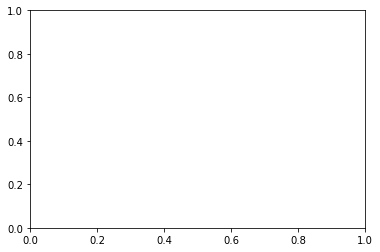

In [33]:
# compare statistical imputation strategies for the horse colic dataset
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
# load dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/horse-colic.csv'
dataframe = read_csv(url, header=None, na_values='?')
# split into input and output elements
data = dataframe.values
ix = [i for i in range(data.shape[1]) if i != 23]
X, y = data[:, ix], data[:, 23]
maximo=0
# evaluate each strategy on the dataset
results = list()
strategies = ['mean', 'median', 'most_frequent', 'constant','omite_10']
    for s in strategies:
    # create the modeling pipeline
        if s=='omite_10':
            
            pipeline = Pipeline(steps=[('i', SimpleImputer(strategy='constant',fill_value=i)), ('m', LogisticRegression())])
        
        else:
            pipeline = Pipeline(steps=[('i', SimpleImputer(strategy=s)), ('m', LogisticRegression())])

    # evaluate the model
        cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
        scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
        # store results
        results.append(scores)
        print('>%s %.3f (%.3f)' % (s, mean(scores), std(scores)))
       
# plot model performance for comparison
pyplot.boxplot(results, labels=strategies, showmeans=True)
pyplot.show()
### 0.7811111111111112 156 fue la mejor constante de 1 a 200

In [122]:
data = df.values
ix = [i for i in range(data.shape[1]) if i != 23]
X, y = data[:, ix], data[:, 23]
# evaluate each strategy on the dataset
results = list()
strategies = ['mean', 'median', 'most_frequent', 'constant']
for s in strategies:
    pipeline = Pipeline(steps=[('i', SimpleImputer(strategy=s)), ('m', LogisticRegression())])
    # evaluate the model
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
        # store results
    results.append(scores)
    print('>%s %.3f (%.3f)' % (s, mean(scores), std(scores)))
       
# plot model performance for comparison
pyplot.boxplot(results, labels=strategies, showmeans=True)
pyplot.show()
### 0.7811111111111112 156 fue la mejor constante de 1 a 200

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [22]:
import numpy as np
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='constant',fill_value=99)
imp_mean.fit([[7, 2, 3], [4, np.nan, 6], [10, 5, 9]])
SimpleImputer()
X = [[np.nan, 2, 3], [4, np.nan, 6], [10, np.nan, 9]]
print(imp_mean.transform(X))


[[99.  2.  3.]
 [ 4. 99.  6.]
 [10. 99.  9.]]


In [31]:
mean(scores)

0.7200000000000001

**Data set cancer: aqui fabricamos nuestros propios nas**

In [8]:
from sklearn.datasets import load_breast_cancer
data_cancer = load_breast_cancer()
data_cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0